# Import utilities module

In [1]:
import warnings
warnings.filterwarnings('ignore')
from utility import *
%matplotlib inline

## Load and preprocess confessions dataset

In [2]:
path = '/Users/tyler/UCSD_Wellness/analysis/Final_Tyler/data/data1.csv'
confessions=pd.read_csv(path)
confessions = prepare_confessions(confessions)

Total time: 0.8532059192657471 secs


## Visualize VAD Scores across Week

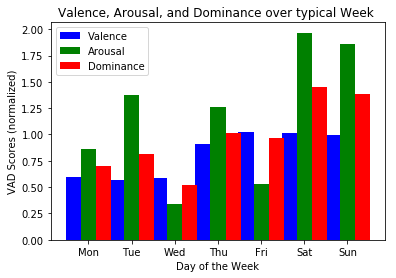

In [3]:
plot_vad_weekday_scores(confessions)

# Visualize nltk Vader across Week

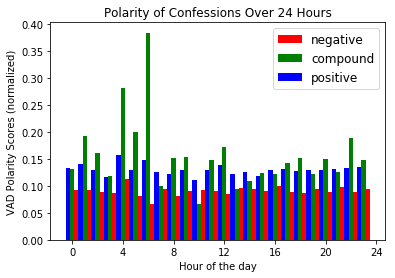

In [4]:
plot_nltk_vader_scores(confessions)

## Train a Word2Vec Model

In [5]:
#Define Model for word embeddings
num_features = 100 # Dimensionality of the hidden layer representation
min_word_count = 35
context = 8
downsampling = 1e-3

model = train_word2vec('extra_clean_comments.csv', num_features,min_word_count,context,downsampling)

Training model...
Total time: 1.3814311027526855 secs


In [6]:
Z = model.wv.syn0

# Cluster and Visualize Word Clouds

In [7]:
#Compute clustering, retrieve top words for visualization.
centers, clusters = clustering_on_wordvecs(Z, 1);
centroid_map = dict(zip(model.wv.index2word, clusters));
top_words = get_top_words(model.wv.index2word, 30, centers, Z);

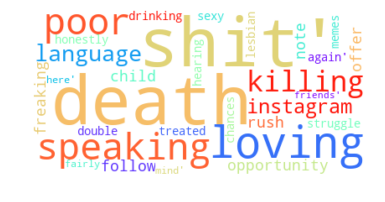

In [8]:
cmaps = 'rainbow'
display_cloud(Z,model,0, cmaps, top_words, label='total')

## Visualize similarity table

In [9]:
# Inspect the word 2 vec model results
tags = ['stressed','sad','relationship','school' ]
similarity_table = visualize_similarity_table(tags, model)
print(similarity_table)

      stressed        sad relationship     school
0      anxious        bad      feeling       high
1     accepted    feeling     feelings    classes
2      suicide  sometimes    boyfriend    college
3         busy   insecure         lost        gpa
4    potential      happy     distance       year
5   struggling     scared          fwb    quarter
6    depressed    worried       having  roommates
7     negative     really       lately      third
8  ['sometimes    knowing        dream       grad
9       regret  depressed   graduating       ucsd


## Demo of auto-tagging a new confession

In [10]:
##  load in new confession to be tagged.
confession = "I am having a really rough day, my girl just dumped with me, AND I failed an exam."

In [11]:
similarity_scores = compute_similarity_scores(confession, tags, model)
suggest_tags = generate_tag_suggestions(similarity_scores, tags, threshold=0.75)
print(suggest_tags)

['sad']
